In [226]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [227]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step:1 Reading Data

In [228]:
df=pd.read_csv('Country-data.csv')

In [229]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [230]:
#Checking some aspects of the data
df.shape

(167, 10)

In [231]:
df.describe(percentiles=[0.0,0.25,0.50,0.75,0.95])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
0%,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
95%,116.000000,80.570000,11.570000,81.140000,48290.000000,20.870000,81.400000,5.861000,48610.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


__Most of the variables has outliers in it so we need to perform outlier analysis.__

In [232]:
#Checking for Null value
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

__Null is not present in the dataset, so no handling is required.__

In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


# Step2: Data Visualization

In [234]:
def country_growth(m,n):
    plt.figure(figsize=(6,4))
    sns.barplot(x=m,y=n,data=df.sort_values(n, ascending = False).head(10))
    plt.xticks(rotation=90)
    plt.show()

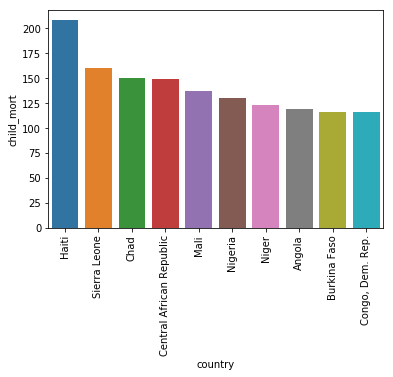

In [235]:
country_growth('country','child_mort')

__Countries with high child death rate are Haiti,Sierra Leone,Chad etc.__

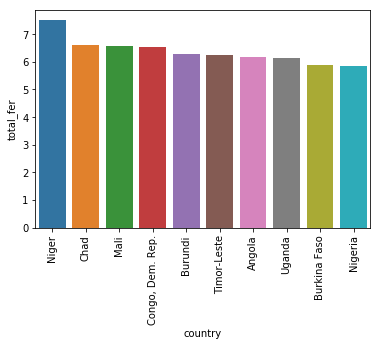

In [236]:
country_growth('country','total_fer')

__Top country with high fertility rate are Niger,Chad,Mali,Congo etc.__

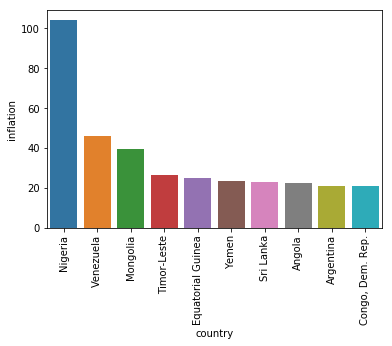

In [237]:
country_growth('country','inflation')

__Countries like Nigeria,Venezuela,Mongolia are having high inflation rate.__

In [238]:
def country_growth1(p,q):
    plt.figure(figsize=(6,4))
    sns.barplot(x=p,y=q,data=df.sort_values(q, ascending = True).head(10))
    plt.xticks(rotation=90)
    plt.show()

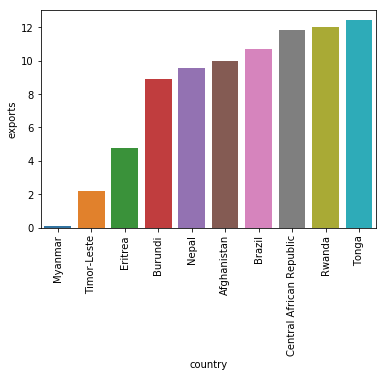

In [239]:
country_growth1('country','exports')

__Countries like Myanmar,Timor-Leste,Eritrea,Nepal are having less export.__

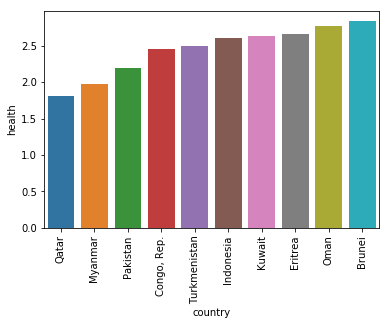

In [240]:
country_growth1('country','health')

__Total spending in health is low in countries like Qatar,Myanmar,Pakisthan,Congo__

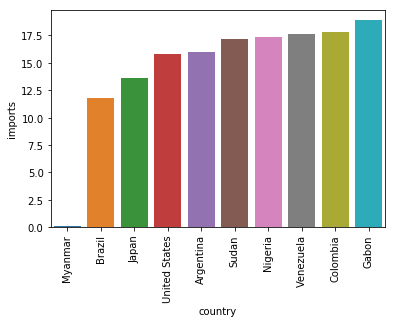

In [241]:
country_growth1('country','imports')

__Imports is less in countries like Myanmar,Brazil,Japan,US__

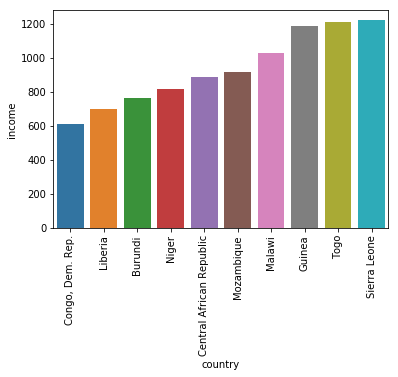

In [242]:
country_growth1('country','income')

__Income is a problem in countries like Congo,Liberia,Burundi,Niger.__

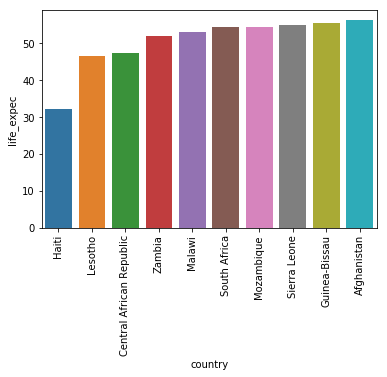

In [243]:
country_growth1('country','life_expec')

__Countries with less life expentancy are Haiti,Lesotho,Central Africa,Zambia.__

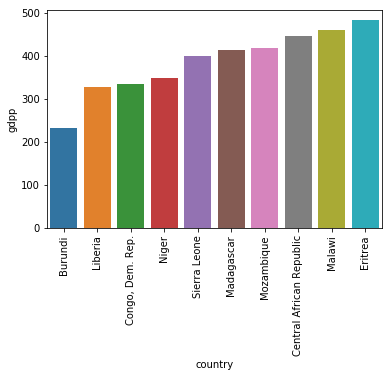

In [244]:
country_growth1('country','gdpp')

__Countries like Burundi,Liberia,Congo,Niger belongs to low gdpp rate.__

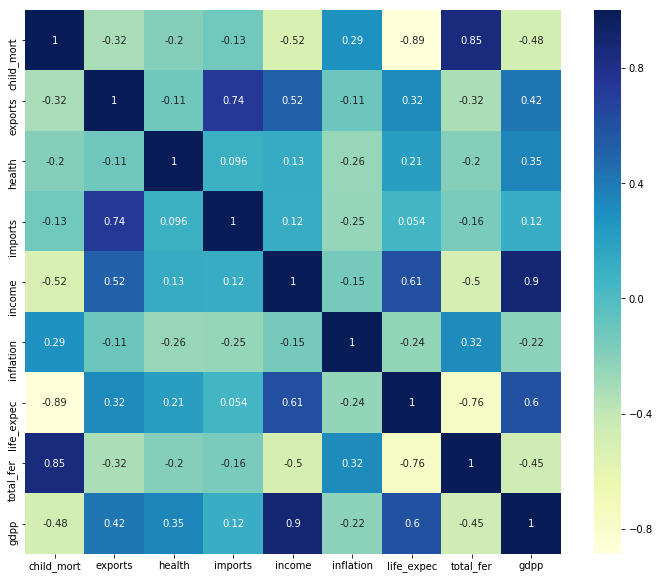

In [245]:
plt.figure(figsize = (12, 10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

__We are seeing some variables are highly correlated with each other, so we will perform PCA on the data in order to find ket attributes which will help in clustering.__

# Step3: Data Preparation

In [246]:
# removing (statistical) outliers
#'child_mort','health','life_expec','total_fer','income','inflation','gdpp','imports','exports'
#Child_Mort
Q1 = df.child_mort.quantile(0.05)
Q3 = df.child_mort.quantile(0.95)
IQR = Q3 - Q1
df = df[(df.child_mort >= Q1 - 1.5*IQR) & (df.child_mort <= Q3 + 1.5*IQR)]
#Health
Q1 = df.health.quantile(0.05)
Q3 = df.health.quantile(0.95)
IQR = Q3 - Q1
df = df[(df.health >= Q1 - 1.5*IQR) & (df.health <= Q3 + 1.5*IQR)]
#life_expec
Q1 = df.life_expec.quantile(0.05)
Q3 = df.life_expec.quantile(0.95)
IQR = Q3 - Q1
df = df[(df.life_expec >= Q1 - 1.5*IQR) & (df.life_expec <= Q3 + 1.5*IQR)]
#total_fer
Q1 = df.total_fer.quantile(0.05)
Q3 = df.total_fer.quantile(0.95)
IQR = Q3 - Q1
df = df[(df.total_fer >= Q1 - 1.5*IQR) & (df.total_fer <= Q3 + 1.5*IQR)]
#income
Q1 = df.income.quantile(0.05)
Q3 = df.income.quantile(0.95)
IQR = Q3 - Q1
df = df[(df.income >= Q1 - 1.5*IQR) & (df.income <= Q3 + 1.5*IQR)]
#inflation
Q1 = df.inflation.quantile(0.05)
Q3 = df.inflation.quantile(0.95)
IQR = Q3 - Q1
df = df[(df.inflation >= Q1 - 1.5*IQR) & (df.inflation <= Q3 + 1.5*IQR)]
#gdpp
Q1 = df.gdpp.quantile(0.05)
Q3 = df.gdpp.quantile(0.95)
IQR = Q3 - Q1
df = df[(df.gdpp >= Q1 - 1.5*IQR) & (df.gdpp <= Q3 + 1.5*IQR)]
#imports
Q1 = df.imports.quantile(0.05)
Q3 = df.imports.quantile(0.95)
IQR = Q3 - Q1
df = df[(df.imports >= Q1 - 1.5*IQR) & (df.imports <= Q3 + 1.5*IQR)]
#exports
Q1 = df.exports.quantile(0.05)
Q3 = df.exports.quantile(0.95)
IQR = Q3 - Q1
df = df[(df.exports >= Q1 - 1.5*IQR) & (df.exports <= Q3 + 1.5*IQR)]



In [247]:
df.shape
#3 rows are removed from the total dataset

(164, 10)

In [248]:
#Creating a copy of the dataset
df_copy = df.copy()
df_copy.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [249]:
from sklearn.preprocessing import StandardScaler

# Create a scaling object
scaler = StandardScaler()

# Create a list of the variables that you need to scale
varlist = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
# Scale these variables using 'fit_transform'
df_copy[varlist] = scaler.fit_transform(df_copy[varlist])


In [250]:
df_copy.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,1.309740,-1.227720,0.259211,-0.069666,-0.865561,0.292980,-1.617380,1.918013,-0.674732
1,Albania,-0.540682,-0.493713,-0.119102,0.098174,-0.372819,-0.368557,0.657844,-0.865534,-0.474542
2,Algeria,-0.271667,-0.069621,-0.993263,-0.682055,-0.196924,1.183049,0.680483,-0.037812,-0.453600
3,Angola,2.033818,0.904976,-1.478092,-0.160390,-0.611491,2.025005,-1.175919,2.144969,-0.506237
4,Antigua and Barbuda,-0.699075,0.219904,-0.310095,0.565404,0.170264,-0.776171,0.714441,-0.545125,-0.015525


# Step4: PCA on the data

In [251]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [252]:
X = df_copy.drop(['country'],axis=1)
y = df_copy['country']

In [253]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [254]:
pca.components_

array([[-0.41707142,  0.26416786,  0.18768908,  0.13037811,  0.41046939,
        -0.19325685,  0.42525158, -0.4006349 ,  0.39605627],
       [ 0.16626965,  0.60959466, -0.14025508,  0.71387142, -0.01780182,
        -0.06583848, -0.2178763 ,  0.13068815, -0.04757916],
       [-0.17969762,  0.23818157, -0.67428713, -0.17159462,  0.1205389 ,
         0.60477777,  0.15830297, -0.11626924, -0.08947802],
       [ 0.34764414,  0.09856524,  0.19229972, -0.17589757,  0.47140389,
         0.33594745, -0.18172433,  0.38900432,  0.531111  ],
       [-0.18183315, -0.01302907,  0.60352928,  0.2518542 , -0.19656821,
         0.67595776,  0.05069234, -0.10140126, -0.17515404],
       [ 0.21153109, -0.04075914,  0.00361447, -0.05029309,  0.15419872,
         0.05496542, -0.60272783, -0.74866795,  0.02162972],
       [-0.06947963, -0.68136406, -0.28952827,  0.57355282,  0.08180463,
         0.11899188,  0.00187661,  0.01061626,  0.31170314],
       [ 0.72455736,  0.01039262, -0.0157946 ,  0.05284916, -0

In [255]:
country_pca=pca.fit_transform(X)

In [256]:
country_pca.shape

(164, 9)

In [257]:
df_country_pca = pd.DataFrame(country_pca)

In [258]:
df_country_pca.head()

,0,1,2,3,4,5,6,7,8
0,-2.966365,0.014543,-1.036420,0.768485,0.126626,-0.261542,0.401584,-0.403996,0.080941
1,0.442288,-0.507039,0.022429,-1.284641,0.085977,0.063871,0.234533,0.240247,0.118873
2,-0.365026,-0.641205,1.663468,-0.247008,0.235243,-0.380903,-0.053153,0.249247,0.033794
3,-3.109768,1.420818,1.634979,1.711483,-0.013499,-0.494992,-0.368264,0.425121,-0.164743
4,1.101124,0.286844,0.019053,-0.911061,-0.384417,-0.225635,0.225092,0.000433,0.132895


In [259]:
df_country_pca['Country']=y

In [260]:
df_country_pca['PC1']=df_country_pca[0]
df_country_pca['PC2']=df_country_pca[1]

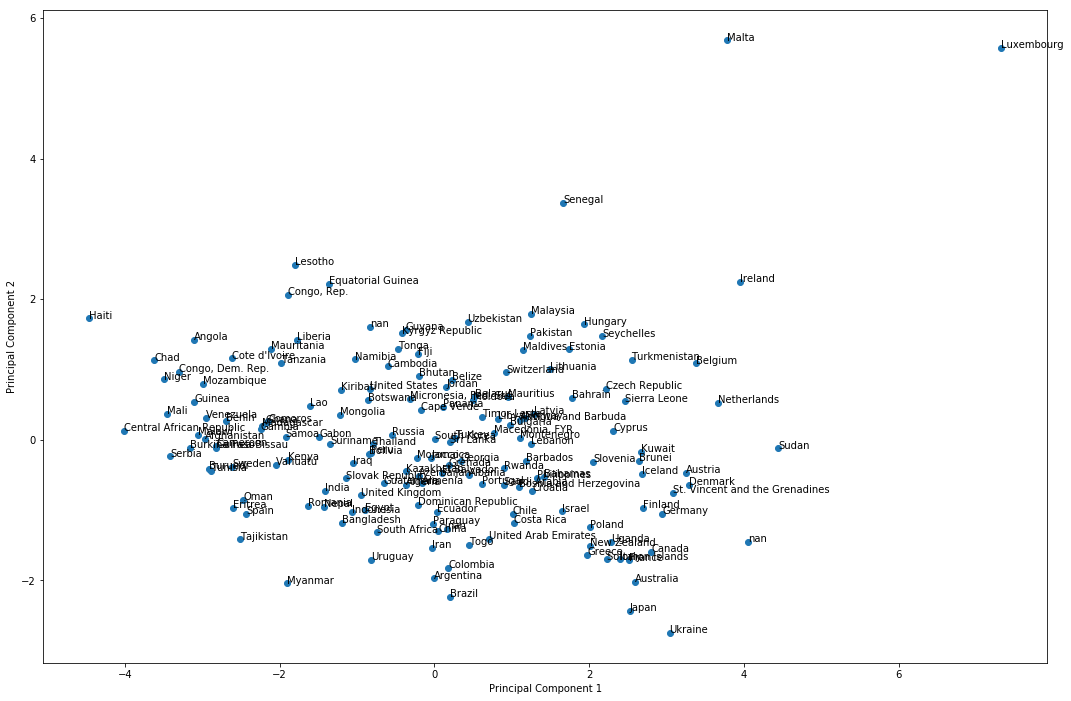

In [300]:
#Visualizing countries with respect to PC1 & PC2
plt.figure(figsize = (18,12))
plt.scatter(df_country_pca.PC1, df_country_pca.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(df_country_pca.Country):
    plt.annotate(txt, (df_country_pca.PC1[i],df_country_pca.PC2[i]))
plt.show()

In [262]:
pca.explained_variance_ratio_

array([0.46176255, 0.1699294 , 0.13516563, 0.10906535, 0.06795329,
       0.0254524 , 0.01460331, 0.00919995, 0.00686812])

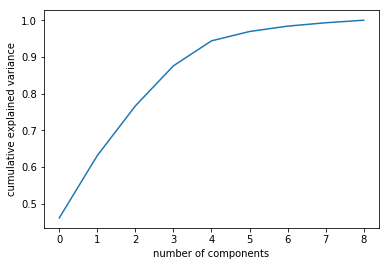

In [263]:
plt.figure(figsize = (6,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

__We can chose upto 4 components are enough to perform analysis as the total cumulative variance is almost 95%.__

In [264]:
#Using number of components 4
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=4)

In [265]:
df_pca = pca_final.fit_transform(X)
df_pca.shape

(164, 4)

In [266]:
df_pca = pd.DataFrame(df_pca)
df_pca.head()

,0,1,2,3
0,-2.965683,0.000212,1.047156,0.752562
1,0.442164,-0.511870,-0.042070,-1.284604
2,-0.364373,-0.620924,-1.674087,-0.228459
3,-3.109204,1.450742,-1.595549,1.725622
4,1.100146,0.286104,-0.032856,-0.903120


In [267]:
corrmat = np.corrcoef(df_pca.transpose())

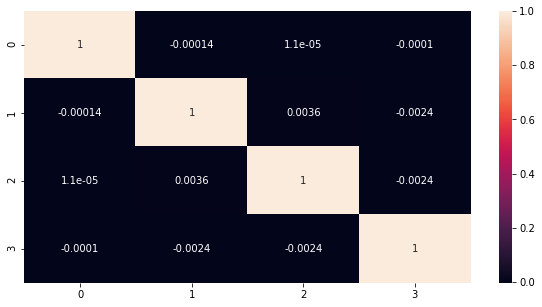

In [268]:
plt.figure(figsize = (10,5))
sns.heatmap(corrmat,annot = True)
plt.show()

__No correlation between variables is observed.__

# Step5: Clustering using k-mean

In [269]:
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [270]:
#Checking for Hopkins-Statistics Score
def hopkins(X):
    d = X.shape[1]
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [271]:
hopkins(df_pca)

0.7863754541413361

__With this score the dataset is suitable for clustering.__

In [272]:
#Using arbitrary k
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(df_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [273]:
kmeans.labels_

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0,
       2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 1,
       1, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 1, 2, 2, 0, 0, 2,
       0, 2, 1, 2, 2, 2, 0, 1, 1, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0,
       0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       1, 1, 0, 1, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 0, 2, 2, 0, 1,
       1, 2, 0, 1, 1, 2, 2, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2,
       1, 1, 1, 2, 2, 2, 2, 2, 0, 0])

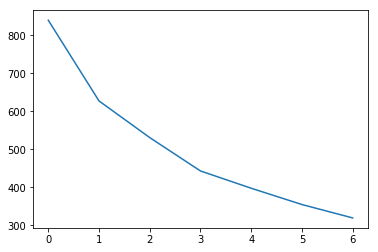

In [274]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_pca)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd)
plt.show()

In [275]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_pca)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    

For n_clusters=2, the silhouette score is 0.3165129082023137
For n_clusters=3, the silhouette score is 0.32454449530566293
For n_clusters=4, the silhouette score is 0.2890427506491569
For n_clusters=5, the silhouette score is 0.30213658810940397
For n_clusters=6, the silhouette score is 0.3073865579040921
For n_clusters=7, the silhouette score is 0.2919289119100766
For n_clusters=8, the silhouette score is 0.27636929962017737


__From both elbow curve and silhouette score we can chose 3 cluster for modelling.__

In [276]:
# final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(df_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [277]:
# assign the label
df_pca['cluster_id'] = kmeans.labels_
df_pca.head()

,0,1,2,3,cluster_id
0,-2.965683,0.000212,1.047156,0.752562,0
1,0.442164,-0.511870,-0.042070,-1.284604,1
2,-0.364373,-0.620924,-1.674087,-0.228459,1
3,-3.109204,1.450742,-1.595549,1.725622,0
4,1.100146,0.286104,-0.032856,-0.903120,1


In [278]:
#Adding country to the dataset 
df_pca['country']=y
df_pca.head()

,0,1,2,3,cluster_id,country
0,-2.965683,0.000212,1.047156,0.752562,0,Afghanistan
1,0.442164,-0.511870,-0.042070,-1.284604,1,Albania
2,-0.364373,-0.620924,-1.674087,-0.228459,1,Algeria
3,-3.109204,1.450742,-1.595549,1.725622,0,Angola
4,1.100146,0.286104,-0.032856,-0.903120,1,Antigua and Barbuda


In [279]:
df_cluster=df_pca[['country','cluster_id']].merge(df,on = 'country')

In [280]:
df_cluster.head()

,country,cluster_id,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,1,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,0,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,1,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


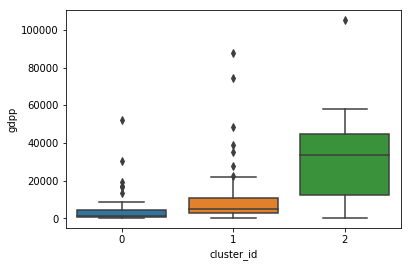

In [281]:
sns.boxplot(x='cluster_id',y='gdpp',data=df_cluster)
plt.show()

__From above cluster_id we can see that cluster_id 0 has the lowest gdpp.__

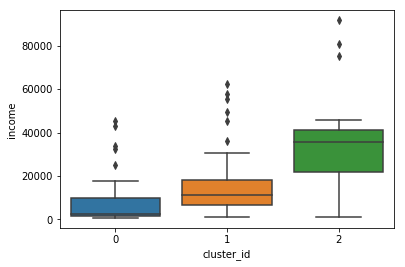

In [282]:
sns.boxplot(x='cluster_id',y='income',data=df_cluster)
plt.show()

__Again cluster_id 0 has the lowest income range compare to cluster_id 1 and  2.__

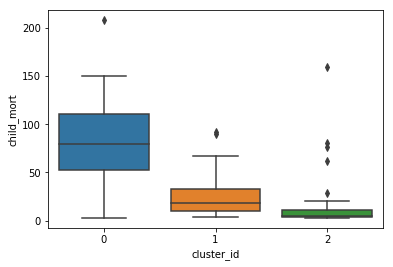

In [283]:
sns.boxplot(x='cluster_id',y='child_mort',data=df_cluster)
plt.show()

__Cluster_id 0 has the highest child death rate.__

So now that we have completed our k-mean modelling, we can conclude that cluster_id 0 is the under-developed country which needs attention and countries belongs to cluster_id 1 the developed countries and countries belong to cluster_id 2 lies in between 0 & 1.

In [284]:
#Checking the no. of countries in cluster_id 0
df_cluster[df_cluster.cluster_id==0].country.count()

46

In [285]:
df_cluster[df_cluster.cluster_id==0].country

0                   Afghanistan
3                        Angola
17                        Benin
21                     Botswana
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
72                         Iraq
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106     

In [286]:
#Checking the name of countries in cluster_id 0
df_cluster[df_cluster.cluster_id==0].sort_values(by=['income','gdpp'], ascending=True)

,country,cluster_id,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
37,"Congo, Dem. Rep.",0,116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334
88,Liberia,0,89.3,19.10,11.80,92.6,700,5.470,60.8,5.02,327
26,Burundi,0,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231
112,Niger,0,123.0,22.20,5.16,49.1,814,2.550,58.8,7.49,348
31,Central African Republic,0,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446
106,Mozambique,0,101.0,31.50,5.21,46.2,918,7.640,54.5,5.56,419
94,Malawi,0,90.5,22.80,6.59,34.9,1030,12.100,53.1,5.31,459
63,Guinea,0,109.0,30.30,4.93,43.2,1190,16.100,58.0,5.34,648
93,Madagascar,0,62.2,25.00,3.77,43.0,1390,8.790,60.8,4.60,413
64,Guinea-Bissau,0,114.0,14.90,8.50,35.2,1390,2.970,55.6,5.05,547


# Step6: Hierarchical Clustering

In [287]:
#Using the pca dataframe for clustering
df_heh=df_pca.copy()
df_heh.drop(['country','cluster_id'],axis=1,inplace=True)
df_heh.head()

,0,1,2,3
0,-2.965683,0.000212,1.047156,0.752562
1,0.442164,-0.511870,-0.042070,-1.284604
2,-0.364373,-0.620924,-1.674087,-0.228459
3,-3.109204,1.450742,-1.595549,1.725622
4,1.100146,0.286104,-0.032856,-0.903120


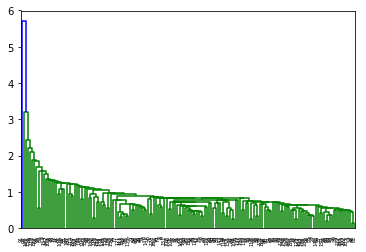

In [288]:
# single linkage
mergings = linkage(df_heh, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

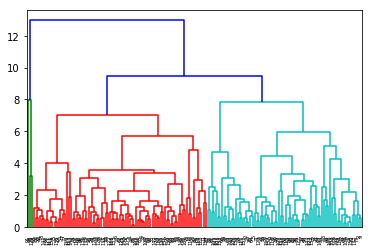

In [289]:
#complete 
mergings=linkage(df_heh,method='complete',metric='euclidean')
dendrogram(mergings)
plt.show()

In [290]:
# 2 clusters
cluster_labels = cut_tree(mergings, n_clusters=2).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [291]:
# assign cluster labels
df_heh['cluster_labels'] = cluster_labels
df_heh['country'] = y
df_heh.head()

,0,1,2,3,cluster_labels,country
0,-2.965683,0.000212,1.047156,0.752562,0,Afghanistan
1,0.442164,-0.511870,-0.042070,-1.284604,0,Albania
2,-0.364373,-0.620924,-1.674087,-0.228459,0,Algeria
3,-3.109204,1.450742,-1.595549,1.725622,0,Angola
4,1.100146,0.286104,-0.032856,-0.903120,0,Antigua and Barbuda


In [292]:
df_heh_cluster=df_heh[['country','cluster_labels']].merge(df,on = 'country')

In [293]:
df_heh_cluster.head()

,country,cluster_labels,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,0,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,0,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,0,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,0,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


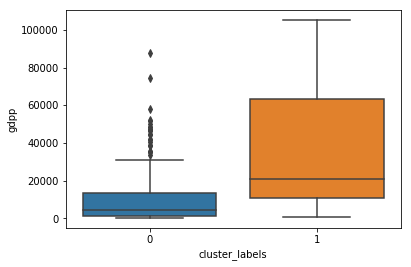

In [294]:
sns.boxplot(x='cluster_labels',y='gdpp',data=df_heh_cluster)
plt.show()

__Cluster label 0 has the lowest gdpp rate among other cluster.__

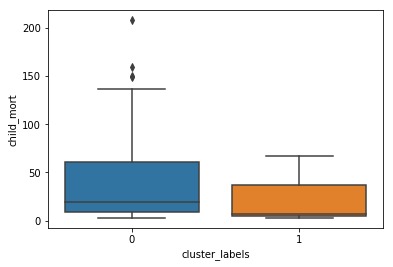

In [295]:
sns.boxplot(x='cluster_labels',y='child_mort',data=df_heh_cluster)
plt.show()

__Cluster label 0 has the highest child death rate__

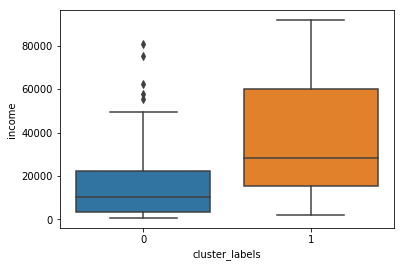

In [296]:
sns.boxplot(x='cluster_labels',y='income',data=df_heh_cluster)
plt.show()

__Cluster labeel 0 has the lowest income.__

From Hierarchical modelling we can conclude that cluster_label with 0 is the under developed countries.

In [297]:
#No of countries belong to cluster_label 0
df_heh_cluster[df_heh_cluster.cluster_labels==0].country.count()

158

In [298]:
#Countries in Cluster_label Zero:
df_heh_cluster[df_heh_cluster.cluster_labels==0].sort_values(by='child_mort',ascending=False)

,country,cluster_labels,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
66,Haiti,0,208.0,15.30,6.91,64.7,1500,5.450,32.1,3.33,662
130,Sierra Leone,0,160.0,16.80,13.10,34.5,1220,17.200,55.0,5.20,399
32,Chad,0,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897
31,Central African Republic,0,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446
97,Mali,0,137.0,22.80,4.98,35.1,1870,4.370,59.5,6.55,708
112,Niger,0,123.0,22.20,5.16,49.1,814,2.550,58.8,7.49,348
3,Angola,0,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530
25,Burkina Faso,0,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575
37,"Congo, Dem. Rep.",0,116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334
64,Guinea-Bissau,0,114.0,14.90,8.50,35.2,1390,2.970,55.6,5.05,547


In [299]:
df_heh_cluster[df_heh_cluster.cluster_labels==0].sort_values(by=['income','gdpp'],ascending=True)

,country,cluster_labels,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
37,"Congo, Dem. Rep.",0,116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334
88,Liberia,0,89.3,19.10,11.80,92.6,700,5.470,60.8,5.02,327
26,Burundi,0,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231
112,Niger,0,123.0,22.20,5.16,49.1,814,2.550,58.8,7.49,348
31,Central African Republic,0,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446
106,Mozambique,0,101.0,31.50,5.21,46.2,918,7.640,54.5,5.56,419
94,Malawi,0,90.5,22.80,6.59,34.9,1030,12.100,53.1,5.31,459
63,Guinea,0,109.0,30.30,4.93,43.2,1190,16.100,58.0,5.34,648
147,Togo,0,90.3,40.20,7.65,57.3,1210,1.180,58.7,4.87,488
130,Sierra Leone,0,160.0,16.80,13.10,34.5,1220,17.200,55.0,5.20,399
